In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import scipy.stats as st
import sidetable

In [3]:
df_tamaño_empresa=pd.read_csv('df_modificado1.csv', index_col=0)
#Me he guardado en excel, los datos con columnas nuevas de género y continentes. Es el que he llamado df_modificado1

In [4]:
df_tamaño_empresa

,index,time,age,gender,country_q3,education_q4,role_q5,experience_q6,Q8,Q11,...,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER,gender_def,continent
0,0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Man,Asia
1,1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,Man,Asia
2,2,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,A laptop,...,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Man,Asia
3,3,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,Man,North America
4,4,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Man,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25968,25968,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,A laptop,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Man,Africa
25969,25969,253,22-24,Man,China,Master’s degree,Student,1-3 years,Python,A personal computer / desktop,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Man,Asia
25970,25970,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,Man,Europe
25971,25971,277,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,A laptop,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Man,North America


In [5]:
df_genero=df_tamaño_empresa.loc[:,[ 'time', 'age', 'gender','gender_def'	,'continent','education_q4','sector_q20','experience_q6','company_size_q21','role_q5','anual_income_q25']]
df_genero
#Reduzco el DataFrame a nuestras columnas de interés

,time,age,gender,gender_def,continent,education_q4,sector_q20,experience_q6,company_size_q21,role_q5,anual_income_q25
0,910,50-54,Man,Man,Asia,Bachelor’s degree,Manufacturing/Fabrication,5-10 years,50-249 employees,Other,"25,000-29,999"
1,784,50-54,Man,Man,Asia,Master’s degree,Manufacturing/Fabrication,20+ years,"1000-9,999 employees",Program/Project Manager,"60,000-69,999"
2,924,22-24,Man,Man,Asia,Master’s degree,Academics/Education,1-3 years,"1000-9,999 employees",Software Engineer,$0-999
3,575,45-49,Man,Man,North America,Doctoral degree,Academics/Education,20+ years,"1000-9,999 employees",Research Scientist,"30,000-39,999"
4,781,45-49,Man,Man,Asia,Doctoral degree,Academics/Education,< 1 years,50-249 employees,Other,"30,000-39,999"
...,...,...,...,...,...,...,...,...,...,...,...
25968,1756,30-34,Man,Man,Africa,Bachelor’s degree,Computers/Technology,1-3 years,"10,000 or more employees",Data Analyst,"15,000-19,999"
25969,253,22-24,Man,Man,Asia,Master’s degree,NaN,1-3 years,NaN,Student,NaN
25970,494,50-54,Man,Man,Europe,Doctoral degree,Academics/Education,I have never written code,"1000-9,999 employees",Research Scientist,$0-999
25971,277,45-49,Man,Man,North America,Master’s degree,Online Service/Internet-based Services,5-10 years,"10,000 or more employees",Data Scientist,NaN


In [6]:
df_genero['company_size_q21'].isnull().sum()
#averiguo los nulos

9722

In [7]:
df_de_nulos=df_genero[df_genero['company_size_q21'].isna()]
df_de_nulos
# me hago DataFrame para poder estudiarlo un poco

,time,age,gender,gender_def,continent,education_q4,sector_q20,experience_q6,company_size_q21,role_q5,anual_income_q25
5,1020,25-29,Woman,Woman,Asia,I prefer not to answer,NaN,< 1 years,NaN,Currently not employed,NaN
6,141,18-21,Woman,Woman,Asia,Some college/university study without earning ...,NaN,1-3 years,NaN,Student,NaN
8,1744,22-24,Man,Man,Europe,Bachelor’s degree,NaN,3-5 years,NaN,Currently not employed,NaN
11,3081,18-21,Woman,Woman,Asia,Master’s degree,NaN,< 1 years,NaN,Student,NaN
12,1922,18-21,Woman,Woman,Asia,Master’s degree,NaN,< 1 years,NaN,Student,NaN
...,...,...,...,...,...,...,...,...,...,...,...
25951,723,22-24,Man,Man,Asia,Master’s degree,NaN,1-3 years,NaN,Student,NaN
25956,25145,40-44,Man,Man,South America,Doctoral degree,NaN,10-20 years,NaN,Research Scientist,NaN
25964,484,22-24,Man,Man,Oceania,Bachelor’s degree,NaN,5-10 years,NaN,Student,NaN
25965,40250,18-21,Man,Man,Asia,Master’s degree,NaN,1-3 years,NaN,Data Analyst,NaN


In [8]:
df_de_nulos['role_q5'].value_counts()
#casi todos son desempleados o estudiantes 8790 registros, del total de nulos en esta columna (9722)

Student                         6804
Currently not employed          1986
Software Engineer                191
Data Scientist                   180
Data Analyst                     130
Machine Learning Engineer        102
Other                             89
Research Scientist                65
Business Analyst                  47
Data Engineer                     38
Program/Project Manager           33
Product Manager                   17
Statistician                      17
DBA/Database Engineer             13
Developer Relations/Advocacy      10
Name: role_q5, dtype: int64

In [9]:
df_de_nulos['role_q5'].value_counts().sum()

9722

In [8]:
df_de_nulos['anual_income_q25'].value_counts()
#en los nulos, como era de esperar, no hay salarios

Series([], Name: anual_income_q25, dtype: int64)

## `Todo el código a partir de aquí, va duplicado, siempre encabeza, la nueva catalogación de géneros consensuada`

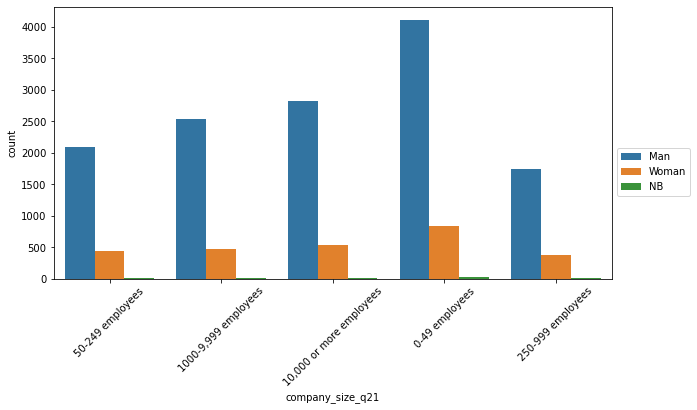

In [15]:

plt.figure(figsize = (10,5))  # establecemos el tamaño de la gráfica
sns.countplot(data =df_genero, x = "company_size_q21", hue = "gender_def") # hacemos el countplot.
plt.xticks(rotation = 45) # rotamos las etiquetas del eje x para que estén a 45 grados
plt.legend( bbox_to_anchor=(1, 0.5));  # movemos la leyenda para colocarla fuera del plot.

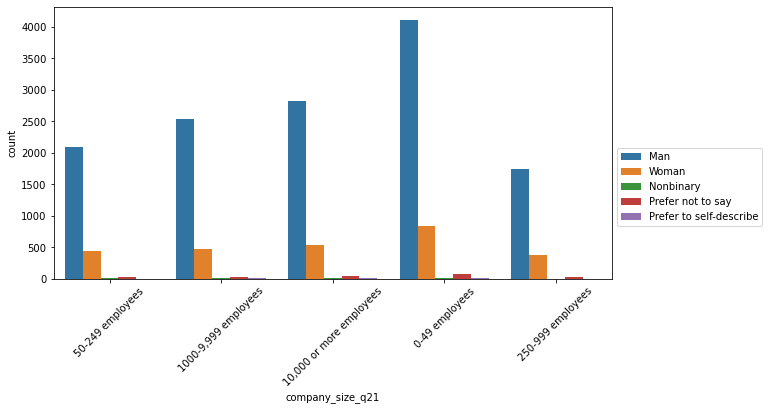

In [10]:

plt.figure(figsize = (10,5))  # establecemos el tamaño de la gráfica
sns.countplot(data =df_genero, x = "company_size_q21", hue = "gender") # hacemos el countplot.
plt.xticks(rotation = 45) # rotamos las etiquetas del eje x para que estén a 45 grados
plt.legend( bbox_to_anchor=(1, 0.5));  # movemos la leyenda para colocarla fuera del plot.

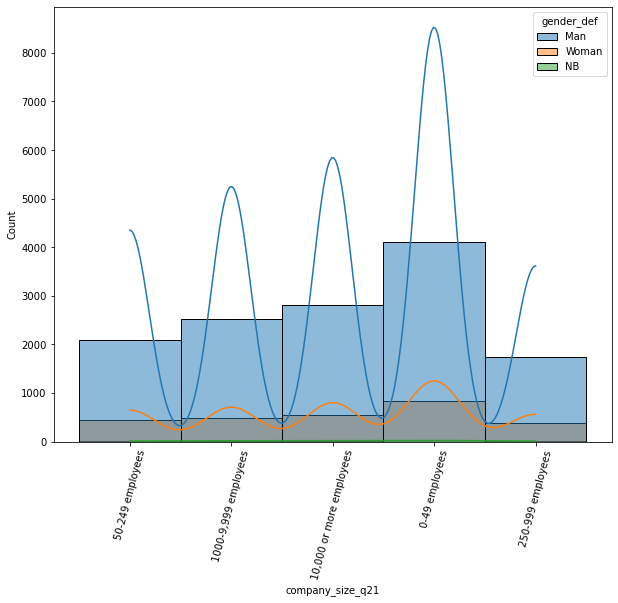

In [78]:
plt.figure(figsize =(10,8))
sns.histplot(x=df_genero['company_size_q21'],data = df_genero, hue='gender_def', kde=True)
plt.xticks(rotation= 75)
plt.show()
#Representacion por tamaño de empresa de la cantidad de individuos según la identidad de género

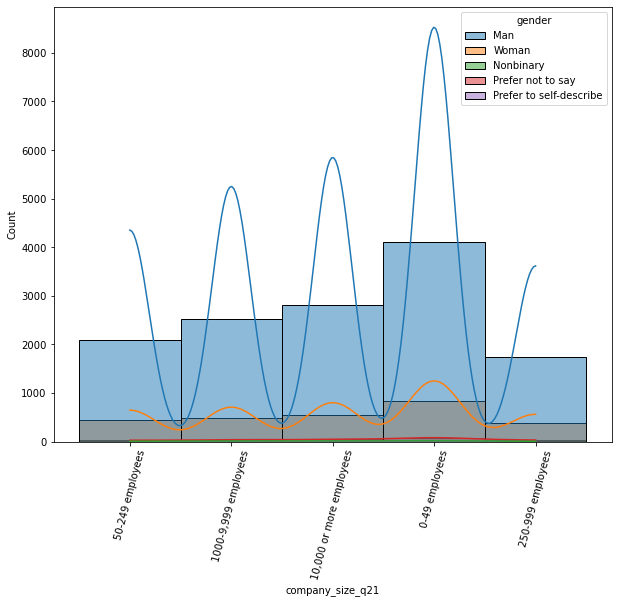

In [88]:
plt.figure(figsize =(10,8))
sns.histplot(x=df_genero['company_size_q21'],data = df_genero, hue='gender', kde=True)
plt.xticks(rotation= 75)
plt.show()
#Representacion por tamaño de empresa de la cantidad de individuos según la identidad de género

In [16]:
df_genero['anual_income_q25'].value_counts()
#aun falta limpiar esta variable

$0-999              3369
1,000-1,999          969
10,000-14,999        950
30,000-39,999        741
100,000-124,999      725
5,000-7,499          699
50,000-59,999        697
40,000-49,999        688
20,000-24,999        587
2,000-2,999          575
15,000-19,999        573
7,500-9,999          552
60,000-69,999        551
25,000-29,999        470
70,000-79,999        464
4,000-4,999          456
150,000-199,999      392
80,000-89,999        391
3,000-3,999          380
125,000-149,999      379
90,000-99,999        350
200,000-249,999      177
300,000-499,999       91
250,000-299,999       75
>$1,000,000           58
$500,000-999,999      32
Name: anual_income_q25, dtype: int64

In [17]:
df_genero.isnull().sum()
#compruebo nulos de las columnas, para saber cuantos datos perderé por nulos, en este caso 9722 del total porque género no tiene nulos

time                    0
age                     0
gender                  0
gender_def            355
continent               0
education_q4            0
sector_q20           9648
experience_q6           0
company_size_q21     9722
role_q5                 0
anual_income_q25    10582
dtype: int64

In [18]:
df_genero['company_size_q21'].value_counts()
#

0-49 employees              5055
10,000 or more employees    3416
1000-9,999 employees        3059
50-249 employees            2567
250-999 employees           2154
Name: company_size_q21, dtype: int64

In [32]:
genero_empresa=pd.DataFrame(df_genero.groupby(['company_size_q21'])['gender_def'].value_counts())
genero_empresa
#Agrupo los datos en un Dataframe en el que enfrento mis dos variables :género y temaño de empresa

gender_def
company_size_q21         gender_def            
0-49 employees           Man               4110
                         Woman              841
                         NB                  25
10,000 or more employees Man               2818
                         Woman              538
                         NB                  16
1000-9,999 employees     Man               2530
                         Woman              476
                         NB                  17
250-999 employees        Man               1742
                         Woman              377
                         NB                   7
50-249 employees         Man               2097
                         Woman              435
                         NB                   9

In [79]:
genero_empresa_todos=pd.DataFrame(df_genero.groupby(['company_size_q21'])['gender'].value_counts())
genero_empresa_todos
#Agrupo los datos en un Dataframe en el que enfrento mis dos variables :género y temaño de empresa

gender
company_size_q21         gender                         
0-49 employees           Man                        4110
                         Woman                       841
                         Prefer not to say            79
                         Nonbinary                    18
                         Prefer to self-describe       7
10,000 or more employees Man                        2818
                         Woman                       538
                         Prefer not to say            44
                         Nonbinary                     9
                         Prefer to self-describe       7
1000-9,999 employees     Man                        2530
                         Woman                       476
                         Prefer not to say            36
                         Nonbinary                    12
                         Prefer to self-describe       5
250-999 employees        Man                        1742
                         Woman                       377
                         Prefer not to say            28
                         Prefer to self-describe       4
                         Nonbinary                     3
50-249 employees         Man                        2097
                         Woman                       435
                         Prefer not to say            26
                         Nonbinary                     7
                         Prefer to self-describe       2

In [35]:
genero_empresa.rename(columns={'gender_def':'frecuencia'}, inplace= True)
genero_empresa.reset_index()
#reordeno Dataframe

,company_size_q21,gender_def,frecuencia
0,0-49 employees,Man,4110
1,0-49 employees,Woman,841
2,0-49 employees,NB,25
3,"10,000 or more employees",Man,2818
4,"10,000 or more employees",Woman,538
5,"10,000 or more employees",NB,16
6,"1000-9,999 employees",Man,2530
7,"1000-9,999 employees",Woman,476
8,"1000-9,999 employees",NB,17
9,250-999 employees,Man,1742


In [80]:
genero_empresa_todos.rename(columns={'gender':'frecuencia'}, inplace= True)
genero_empresa_todos.reset_index()
#reordeno Dataframe

,company_size_q21,gender,frecuencia
0,0-49 employees,Man,4110
1,0-49 employees,Woman,841
2,0-49 employees,Prefer not to say,79
3,0-49 employees,Nonbinary,18
4,0-49 employees,Prefer to self-describe,7
5,"10,000 or more employees",Man,2818
6,"10,000 or more employees",Woman,538
7,"10,000 or more employees",Prefer not to say,44
8,"10,000 or more employees",Nonbinary,9
9,"10,000 or more employees",Prefer to self-describe,7


In [65]:
tamaño_genero=pd.DataFrame(pd.crosstab(df_genero['company_size_q21'], df_genero['gender_def']).apply(lambda x:round(x*100/x.sum(), 2), axis=0))
tamaño_genero
#Hago tabla de frecuencias de las variables

gender_def,Man,NB,Woman
company_size_q21,,,
0-49 employees,30.91,33.78,31.53
"10,000 or more employees",21.19,21.62,20.17
"1000-9,999 employees",19.03,22.97,17.85
250-999 employees,13.10,9.46,14.14
50-249 employees,15.77,12.16,16.31


In [73]:
tamaño_genero2=pd.DataFrame(pd.crosstab(df_genero['company_size_q21'], df_genero['gender']).apply(lambda x:round(x*100/x.sum(), 2), axis=0))
tamaño_genero2
#Hago tabla de frecuencias de las variables

gender,Man,Nonbinary,Prefer not to say,Prefer to self-describe,Woman
company_size_q21,,,,,
0-49 employees,30.91,36.73,37.09,28.0,31.53
"10,000 or more employees",21.19,18.37,20.66,28.0,20.17
"1000-9,999 employees",19.03,24.49,16.90,20.0,17.85
250-999 employees,13.10,6.12,13.15,16.0,14.14
50-249 employees,15.77,14.29,12.21,8.0,16.31


In [66]:
tamaño_genero=tamaño_genero.T.reindex(columns=['0-49 employees','50-249 employees','250-999 employees','1000-9,999 employees','10,000 or more employees'])
tamaño_genero

company_size_q21,0-49 employees,50-249 employees,250-999 employees,"1000-9,999 employees","10,000 or more employees"
gender_def,,,,,
Man,30.91,15.77,13.10,19.03,21.19
NB,33.78,12.16,9.46,22.97,21.62
Woman,31.53,16.31,14.14,17.85,20.17


In [74]:
tamaño_genero2=tamaño_genero2.T.reindex(columns=['0-49 employees','50-249 employees','250-999 employees','1000-9,999 employees','10,000 or more employees'])
tamaño_genero2

company_size_q21,0-49 employees,50-249 employees,250-999 employees,"1000-9,999 employees","10,000 or more employees"
gender,,,,,
Man,30.91,15.77,13.10,19.03,21.19
Nonbinary,36.73,14.29,6.12,24.49,18.37
Prefer not to say,37.09,12.21,13.15,16.90,20.66
Prefer to self-describe,28.00,8.00,16.00,20.00,28.00
Woman,31.53,16.31,14.14,17.85,20.17


In [67]:
tamaño_genero3=tamaño_genero.T.reset_index()
tamaño_genero3

gender_def,company_size_q21,Man,NB,Woman
0,0-49 employees,30.91,33.78,31.53
1,50-249 employees,15.77,12.16,16.31
2,250-999 employees,13.10,9.46,14.14
3,"1000-9,999 employees",19.03,22.97,17.85
4,"10,000 or more employees",21.19,21.62,20.17


In [75]:
tamaño_genero2=tamaño_genero2.T.reset_index()
tamaño_genero2

gender,company_size_q21,Man,Nonbinary,Prefer not to say,Prefer to self-describe,Woman
0,0-49 employees,30.91,36.73,37.09,28.0,31.53
1,50-249 employees,15.77,14.29,12.21,8.0,16.31
2,250-999 employees,13.10,6.12,13.15,16.0,14.14
3,"1000-9,999 employees",19.03,24.49,16.90,20.0,17.85
4,"10,000 or more employees",21.19,18.37,20.66,28.0,20.17


A partir de aqui, convierto en arrays mis columnas, para hacer porcentajes y posibles operaciones aritmeticas

In [34]:
def porcentaje(array):
    array2=[]
    for i in array:
    #print(i)
        z=i*100/array.sum()
        array2.append(z)
    return np.round(np.array(array2), decimals=2)
    #funcion para hallar porcentajes
    #print(z)

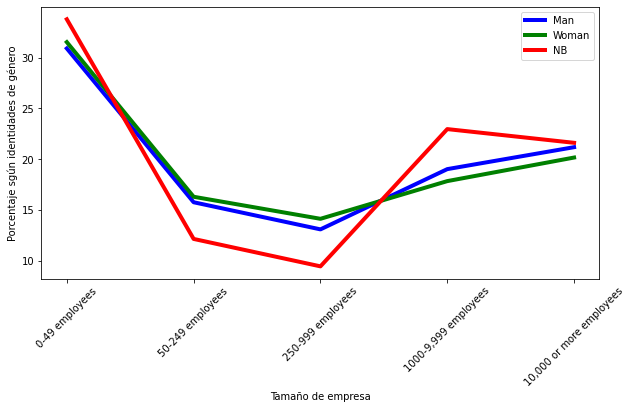

In [81]:
plt.figure(figsize=(10,5))
sns.lineplot(x=tamaño_genero3['company_size_q21'],y=tamaño_genero3['Man'], label = 'Man', linewidth = 4, color = 'blue')
sns.lineplot(x=tamaño_genero3['company_size_q21'],y=tamaño_genero3['Woman'], label = 'Woman', linewidth = 4, color = 'green')
sns.lineplot(x=tamaño_genero3['company_size_q21'],y=tamaño_genero3['NB'], label = 'NB', linewidth = 4, color = 'red')
plt.xticks(rotation= 45)
plt.ylabel('Porcentaje sgún identidades de género')
plt.xlabel('Tamaño de empresa')
plt.show()
#representacion de porcentajes

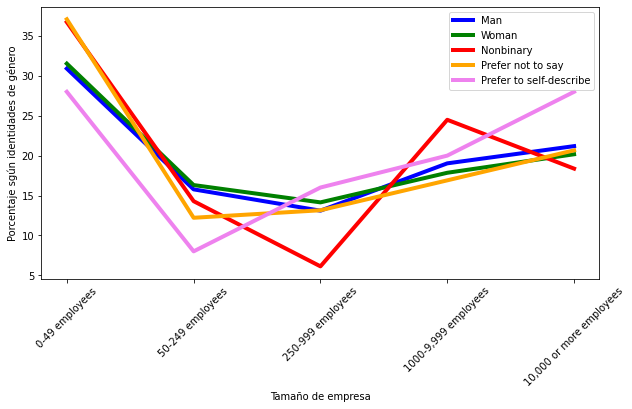

In [76]:
plt.figure(figsize=(10,5))
sns.lineplot(x=tamaño_genero2 ['company_size_q21'],y=tamaño_genero2['Man'], label = 'Man', linewidth = 4, color = 'blue')
sns.lineplot(x=tamaño_genero2['company_size_q21'],y=tamaño_genero2['Woman'], label = 'Woman', linewidth = 4, color = 'green')
sns.lineplot(x=tamaño_genero2['company_size_q21'],y=tamaño_genero2['Nonbinary'], label = 'Nonbinary', linewidth = 4, color = 'red')
sns.lineplot(x=tamaño_genero2['company_size_q21'],y=tamaño_genero2['Prefer not to say'], label = 'Prefer not to say', linewidth = 4, color = 'orange')
sns.lineplot(x=tamaño_genero2['company_size_q21'],y=tamaño_genero2['Prefer to self-describe'], label = 'Prefer to self-describe', linewidth = 4, color = 'violet')
plt.xticks(rotation= 45)
plt.ylabel('Porcentaje sgún identidades de género')
plt.xlabel('Tamaño de empresa')
plt.show()
#representacion de porcentajes

La distribución por géneros, es bastante similar, se concentran en pequeña empresa y las empresas más grandes.
La única diferencia más sustancial , la observamos en los encuestados no binarios, que en mediana empresa a penas están presentes (aún no sabemos si es una diferencia significativa)

En el estudio realizado con los encuestados que prefieren no definirse, hemos restado 355 registros que se han valorado como nulos según referencias, vemos que esta población, sigue una distribución similar a la binaria.